In [1]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

from casual_preprocessing import full_preprocess
from predicting import bert_encode, tokenizer
max_len = 41

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\ekphrasis\classes\exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...
Reading twitter - 1grams ...
Reading twitter - 2grams ...
Reading twitter - 1grams ...


In [2]:
best_model_bert = keras.models.load_model('best_model_bert.h5',  custom_objects={'KerasLayer':hub.KerasLayer})

In [178]:
comment = "💔"
comment = full_preprocess(comment)
print(comment)

:broken_heart:


In [179]:
comments = []
comments.append(comment)
comments.append(comment)
input_comment = bert_encode(comments, tokenizer, max_len=max_len)

In [180]:
result = best_model_bert.predict(input_comment)

1/1 [==============================] - 0s 41ms/step


In [181]:
emotions = ['anger','disgust','fear','happy','neutral','sad','surprise']
data = result[0]
emodict = dict(zip(emotions,data))
e = {k: v for k, v in sorted(emodict.items(), key=lambda item: item[1],reverse=True)}
for key,item in e.items():
  print('{} :{:.2%}'.format(key, item))

sad :37.02%
neutral :18.81%
happy :6.99%
disgust :5.41%
anger :4.60%
fear :3.80%
surprise :3.07%


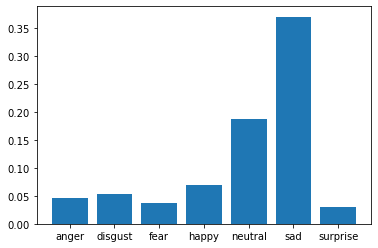

In [182]:
plt.bar(*zip(*emodict.items()))
plt.show()